In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

df = pd.read_csv("AmesHousing.csv")

print(df.shape)
print(df.head())


(2930, 82)
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice

In [11]:
## delete id colums
id_cols = ["Order", "PID"]
df = df.drop(columns=id_cols)

df["SalePrice"].describe()


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

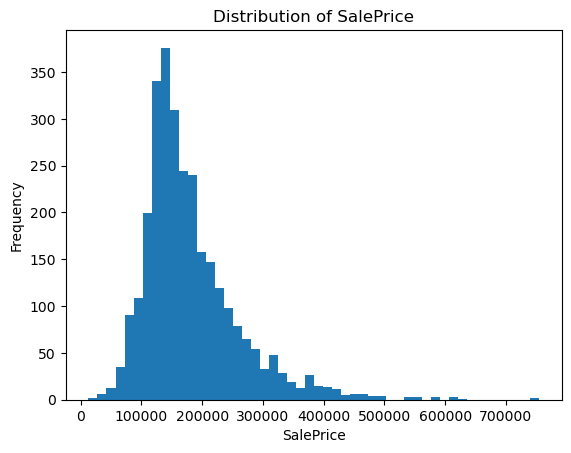

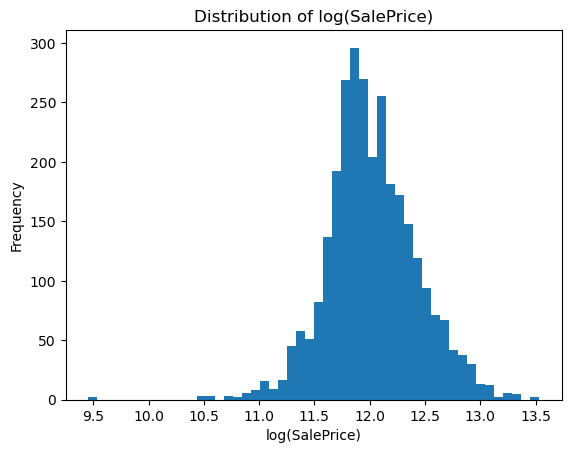

In [12]:
plt.hist(df["SalePrice"], bins=50)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrice")
plt.show()

plt.hist(np.log(df["SalePrice"]), bins=50)
plt.xlabel("log(SalePrice)")
plt.ylabel("Frequency")
plt.title("Distribution of log(SalePrice)")
plt.show()



In [14]:
## only numeric features for baseline model
num_df = df.select_dtypes(include=[np.number])

X = num_df.drop(columns=["SalePrice"])
y = num_df["SalePrice"]

pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("model", LinearRegression())
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

rmse = -cross_val_score(
    pipeline,
    X,
    y,
    scoring="neg_root_mean_squared_error",
    cv=cv
)

print("Baseline RMSE (Linear Regression with median imputation):")
print("Mean:", rmse.mean())
print("Std:", rmse.std())

y_log = np.log(y)

rmse_log = -cross_val_score(
    pipeline,
    X,
    y_log,
    scoring="neg_root_mean_squared_error",
    cv=cv
)

print("RMSE_log:")
print("Mean:", rmse_log.mean())
print("Std:", rmse_log.std())


Baseline RMSE (Linear Regression with median imputation):
Mean: 34076.24560991758
Std: 3557.4489581192397
RMSE_log:
Mean: 0.151009417568826
Std: 0.01663266541341949
